# Ensemble Methods Practice Notebook

Welcome to the practice notebook on ensemble methods! This notebook will guide you through the process of using ensemble techniques to predict customer churn. The dataset consists of various features related to bank customers, and your goal is to build predictive models to determine whether a customer will churn. Here is a brief explanation of the dataset's columns:

- **`customer_id`**: A unique identifier for each customer.
- **`credit_score`**: The customer's credit score.
- **`country`**: The country where the customer resides.
- **`gender`**: The customer's gender.
- **`age`**: The customer's age.
- **`tenure`**: The number of years the customer has been with the bank.
- **`balance`**: The customer's account balance.
- **`products_number`**: The number of bank products the customer uses.
- **`credit_card`**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- **`active_member`**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **`estimated_salary`**: The customer's estimated annual salary.
- **`churn`**: The target variable, indicating whether the customer has churned (1 = Yes, 0 = No).

As you work through the notebook, you will load the data, preprocess it, and apply various ensemble methods such as Random Forest to predict the churn status. Remember to evaluate the performance of your models using appropriate metrics. Enjoy your practice and aim to identify the most effective ensemble technique for this problem!

## Task
Your task is to:
1. Load the dataset.
2. Preprocess the data (if necessary).
3. Implement Bagging models.
4. Evaluate the models performance.

# Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


In [74]:
df=pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns, relationships, and anomalies in the dataset. Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `churn` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features to identify potential multicollinearity.

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df['churn'].value_counts()

,count
churn,
0,7963
1,2037


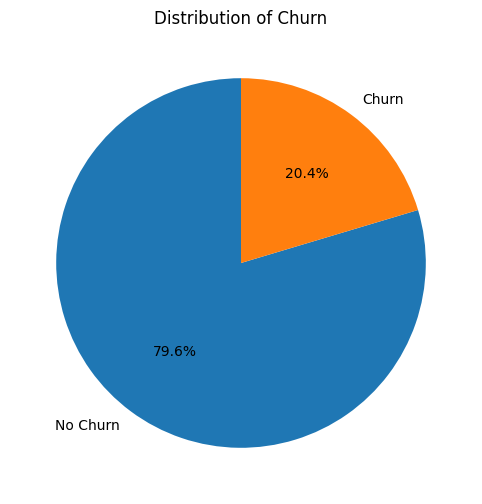

In [6]:

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['churn'].value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churn')
plt.show()

The diagram show that this is an imblanaced dataset since 'No churn' is significantly more than 'Churn'

<ipython-input-10-3a0b2c32b07f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Churn', 'Churn'])


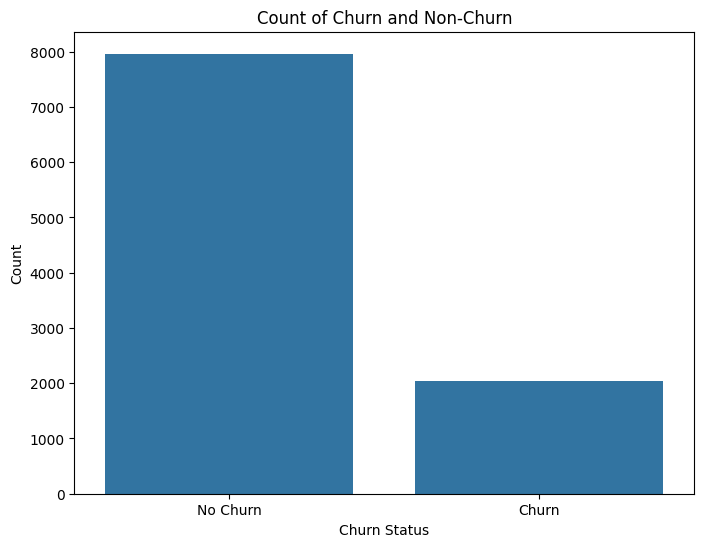

In [10]:


# Plot bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='churn', data=df)
# Update x-axis labels
ax.set_xticklabels(['No Churn', 'Churn'])
# Add title and labels
plt.title('Count of Churn and Non-Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count')

# Show plot
plt.show()

In [16]:
# Compute correlation matrix
corr_matrix = df[['credit_score', 'age', 'tenure', 'balance', 'products_number',
                   'credit_card','active_member', 'estimated_salary', 'churn']].corr()

print(corr_matrix)

                  credit_score       age    tenure   balance  products_number  \
credit_score          1.000000 -0.003965  0.000842  0.006268         0.012238   
age                  -0.003965  1.000000 -0.009997  0.028308        -0.030680   
tenure                0.000842 -0.009997  1.000000 -0.012254         0.013444   
balance               0.006268  0.028308 -0.012254  1.000000        -0.304180   
products_number       0.012238 -0.030680  0.013444 -0.304180         1.000000   
credit_card          -0.005458 -0.011721  0.022583 -0.014858         0.003183   
active_member         0.025651  0.085472 -0.028362 -0.010084         0.009612   
estimated_salary     -0.001384 -0.007201  0.007784  0.012797         0.014204   
churn                -0.027094  0.285323 -0.014001  0.118533        -0.047820   

                  credit_card  active_member  estimated_salary     churn  
credit_score        -0.005458       0.025651         -0.001384 -0.027094  
age                 -0.011721       0.0

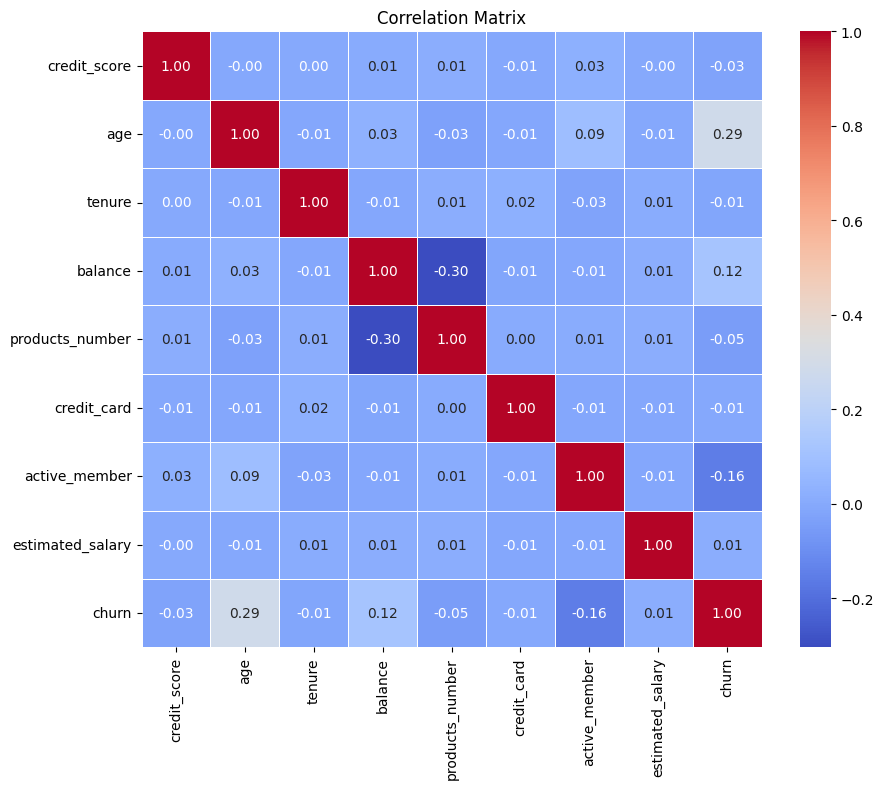

In [17]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

there is a corr between customer age and churn

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding. In this dataset, the `country` and `gender` columns are categorical.

3. **Feature Scaling**: Standardize or Normalize numerical features to have a consistent scale, especially if you plan to use models sensitive to feature scaling. Consider using StandardScaler or MinMaxScaler from the `sklearn.preprocessing` module.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling. For instance, `customer_id` is a unique identifier and doesn't contribute to predicting churn.

In [75]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [76]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoders for 'country' and 'gender'
country = LabelEncoder()
gender = LabelEncoder()

In [77]:
# Apply Label Encoding
df['country_encoded'] = country.fit_transform(df['country'])
df['gender_encoded'] = gender.fit_transform(df['gender'])

In [21]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_encoded,gender_encoded
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0


In [78]:
# Drop original 'country' and 'gender' columns
df_encoded = df.drop(columns=['customer_id' ,'country', 'gender'])

In [79]:
df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_encoded,gender_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [71]:
# Compute correlation matrix
cor_matrix = df_encoded.corr()

print(cor_matrix)

                  credit_score       age    tenure   balance  products_number  \
credit_score          1.000000 -0.003965  0.000842  0.006268         0.012238   
age                  -0.003965  1.000000 -0.009997  0.028308        -0.030680   
tenure                0.000842 -0.009997  1.000000 -0.012254         0.013444   
balance               0.006268  0.028308 -0.012254  1.000000        -0.304180   
products_number       0.012238 -0.030680  0.013444 -0.304180         1.000000   
credit_card          -0.005458 -0.011721  0.022583 -0.014858         0.003183   
active_member         0.025651  0.085472 -0.028362 -0.010084         0.009612   
estimated_salary     -0.001384 -0.007201  0.007784  0.012797         0.014204   
churn                -0.027094  0.285323 -0.014001  0.118533        -0.047820   
country_encoded       0.007888  0.022812  0.003739  0.069408         0.003972   
gender_encoded       -0.002857 -0.027544  0.014733  0.012087        -0.021859   

                  credit_ca

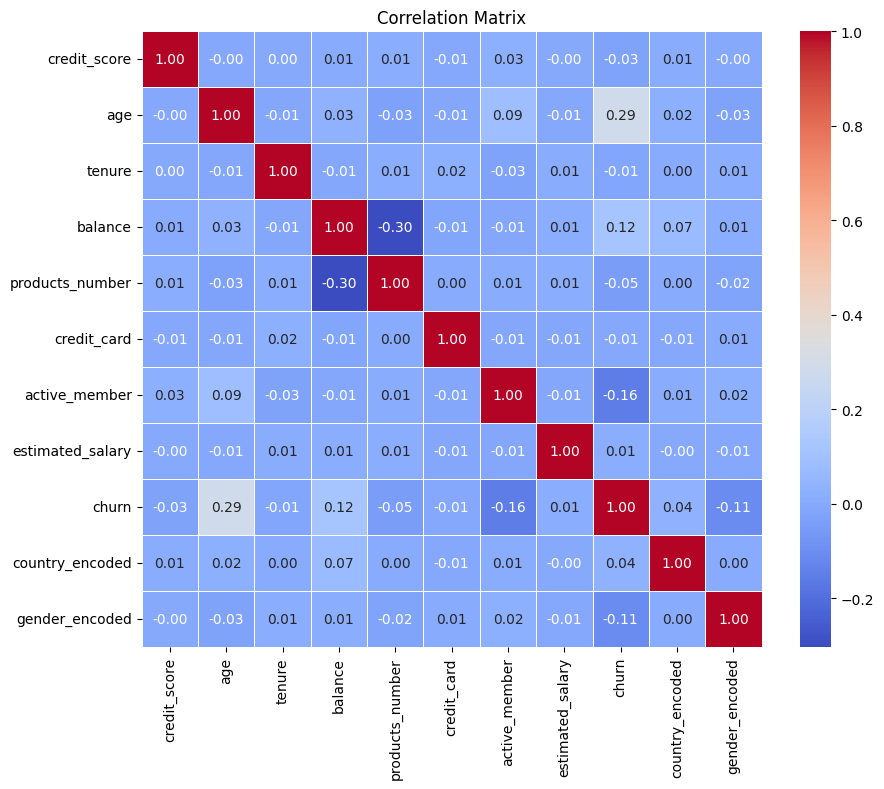

In [72]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Distribution of Numerical Features**: Plot histograms to see the distribution of numerical features such as `age`, `balance`, and `estimated_salary`.

2. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as `country`, `gender`, and `products_number`.

3. **Churn Rate Analysis**: Visualize the churn rate in relation to different features to identify patterns or factors that might influence churn.

4. **Pair Plot**: Use a pair plot to visualize relationships between numerical features and see how they are distributed across different classes of the target variable.

5. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

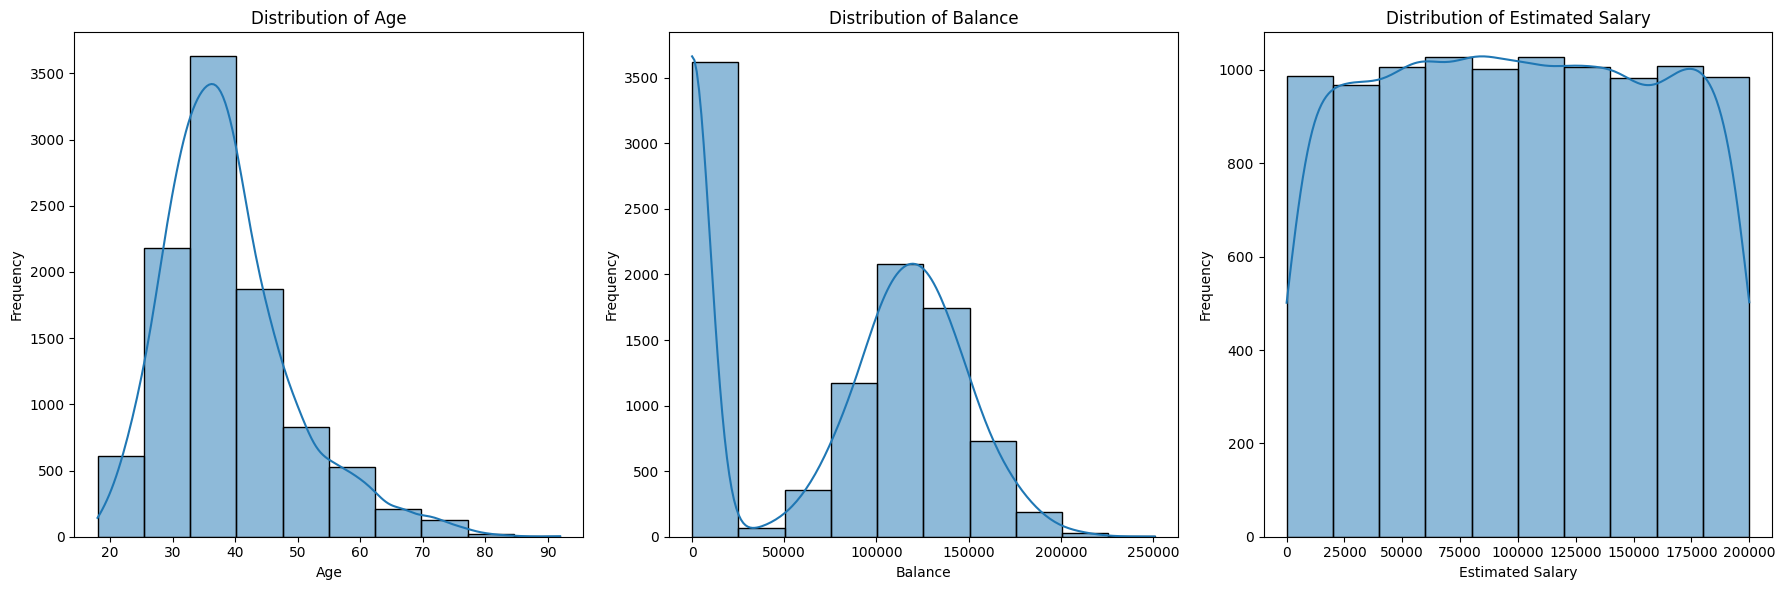

In [28]:
# Plot histograms for numerical features
plt.figure(figsize=(18, 6))

# Histogram for Age
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Balance
plt.subplot(1, 3, 2)
sns.histplot(df['balance'], kde=True, bins=10)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Histogram for Estimated Salary
plt.subplot(1, 3, 3)
sns.histplot(df['estimated_salary'], kde=True, bins=10)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Age and Balance resembel normal distribution, while estimated salary has a more uniform distribution

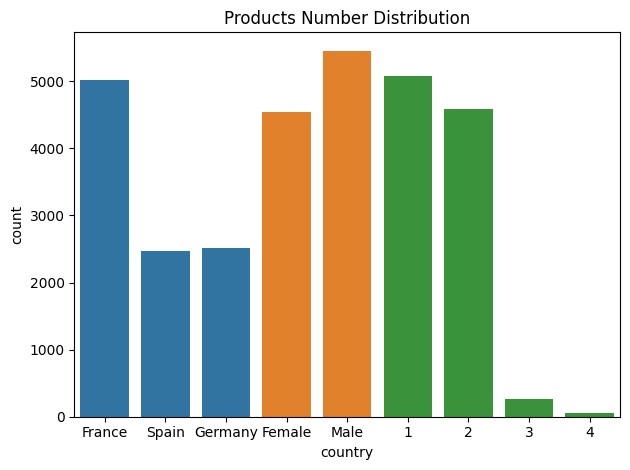

In [30]:
# Count plot for Country
sns.countplot(x='country', data=df)
plt.title('Country Distribution')


# Count plot for Gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')


# Count plot for Products Number
sns.countplot(x='products_number', data=df)
plt.title('Products Number Distribution')

plt.tight_layout()
plt.show()

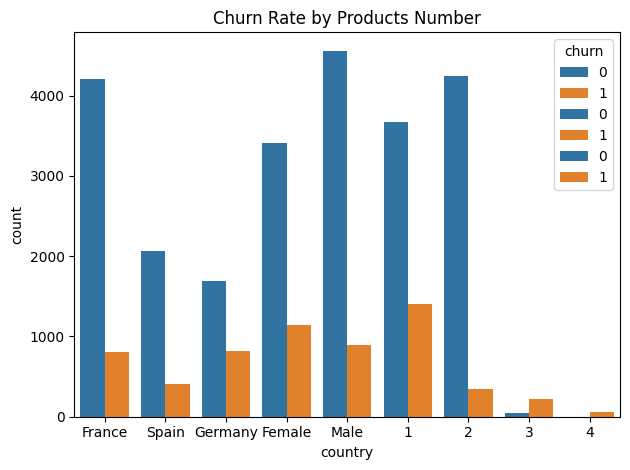

In [32]:
# Churn Rate by Country
sns.countplot(x='country', hue='churn', data=df)
plt.title('Churn Rate by Country')


# Churn Rate by Gender
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn Rate by Gender')


# Churn Rate by Products Number
sns.countplot(x='products_number', hue='churn', data=df)
plt.title('Churn Rate by Products Number')


plt.tight_layout()
plt.show()

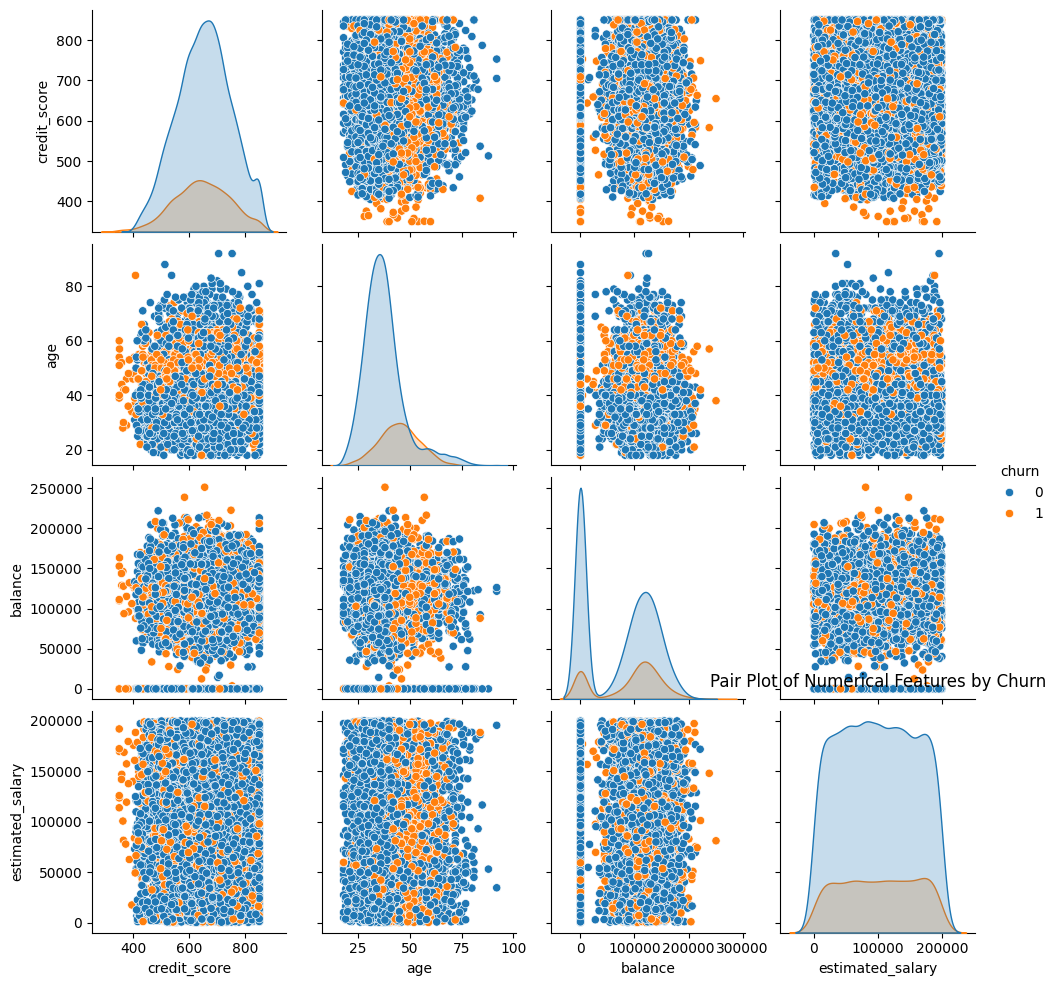

In [33]:
# Pair Plot for numerical features
sns.pairplot(df, hue='churn', vars=['credit_score', 'age', 'balance', 'estimated_salary'])
plt.title('Pair Plot of Numerical Features by Churn')
plt.show()

# Split the Dataset

Splitting the dataset into training and testing sets is essential for evaluating the performance of your models. This ensures that the models are trained and evaluated on separate data, providing an unbiased assessment of their predictive capabilities.

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data. Typically, 70-80% of the data is used for training, and 20-30% is used for testing.

In [80]:
import sklearn
from sklearn.model_selection import train_test_split


In [81]:
X=df_encoded.drop('churn',axis=1)
y=df_encoded['churn']

In [82]:

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:

#from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
#scaler = StandardScaler()

# Fit and transform the training data, transform the test data
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Initialize and Train the Classifiers

## Random Forest
Initialize and train a Random Forest classifier.

In [86]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
# Initialize and train a Random Forest classifier
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data :X_train_scaled
randomforest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [87]:
# with sclale:X_test_scaled
y_pred=randomforest.predict(X_test)
y_pred_proba=randomforest.predict_proba(X_test)[:, 1]

### Evaluate the model performance

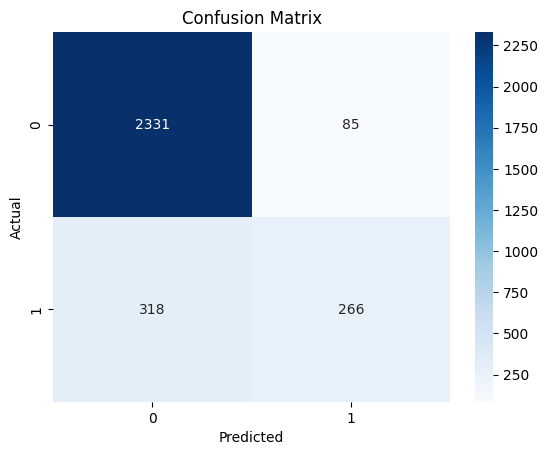

Accuracy: 0.87
Precision: 0.76
Recall: 0.46
F1 Score: 0.57
ROC-AUC Score: 0.85


In [88]:
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

## XGBoost
Initialize and train an XGBoost classifier.

In [89]:
import xgboost as xgb
# Initialize and train an XGBoost classifier
xgboost = xgb.XGBClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data :X_train_scaled
xgboost.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [90]:
# Predict on the test data : X_test_scaled
y_pred = xgboost.predict(X_test)
y_pred_proba = xgboost.predict_proba(X_test)[:, 1]

### Evaluate the model performance

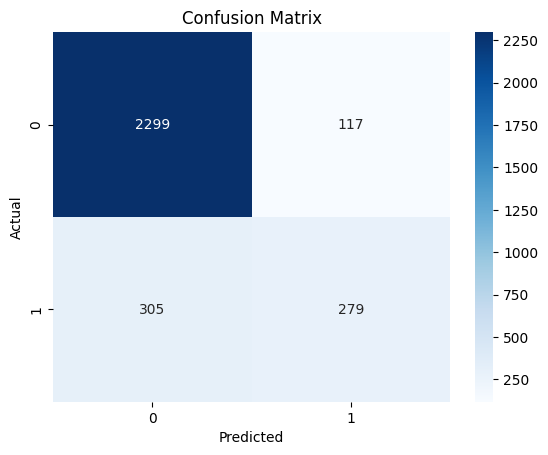

Accuracy: 0.86
Precision: 0.70
Recall: 0.48
F1 Score: 0.57
ROC-AUC Score: 0.85


In [91]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

### Define meta-learner (LogisticRegression)

In [95]:
# Initialize the meta-learner
from sklearn.linear_model import LogisticRegression
meta_learner = LogisticRegression()


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [96]:
import sklearn
from sklearn.ensemble import StackingClassifier
# Initialize the base learners
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
# Initialize the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=[('rf', rf_classifier), ('xgb', xgb_classifier)],
    final_estimator=meta_learner,
    cv=5
)

# Fit the stacking classifier to the training data
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importa...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

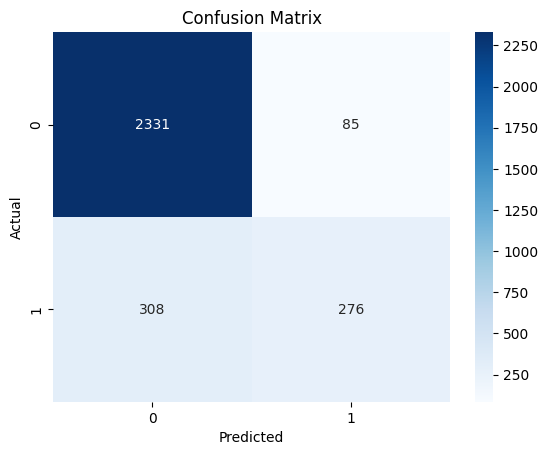

Accuracy: 0.87
Precision: 0.76
Recall: 0.47
F1 Score: 0.58
ROC-AUC Score: 0.86


In [97]:
# Predict on the test data
y_pred = stacking_classifier.predict(X_test)
y_pred_proba = stacking_classifier.predict_proba(X_test)[:, 1]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

Boosting



1. AdaBoost


In [99]:
import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize base classifier and AdaBoost Meta-estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = adaboost_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'AdaBoost Classifier Model Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Classifier Model Accuracy: 86.00%



2.   GradientBoost



In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [101]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [102]:
predictions = gradient_boosting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Gradient Boosting Classifier Model Accuracy: {accuracy * 100:.2f}%')

Gradient Boosting Classifier Model Accuracy: 87.00%


# Practice Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?

* **Challenges and Learnings**
   - What were the main challenges you faced during this project, and how did you overcome them?
   - What are your key takeaways from this exercise, and how would you apply these learnings to future projects?


# Answer here:

These features—credit score, balance, age, and active member status—are important because they show a customer’s financial health, how engaged they are with the service, and where they are in life. By looking at these features, we can better predict if a customer might leave, which helps the business take steps to keep them.

**Model Selection**
chose ensemble methods like Random Forest and XGBoost for their ability to combine the strengths of multiple models, reducing variance (via bagging in Random Forest) and bias (via boosting in XGBoost). Ensemble methods often perform better by capturing more complex patterns and reducing the risk of overfitting.

**Model Evaluation**
Confusion Matrix: The confusion matrix is a simple way to see how many predictions were correct and where the model made mistakes. For example, if there are many false negatives, the model is missing out on predicting churns, which could be a weakness. If there are many false positives, the model might be overly cautious, predicting churn too often.